In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Cyclegan

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *

In [4]:
from cgan.options.train_options import *

In [5]:
opt = TrainOptions().parse(['--dataroot', './data/cyclic/sail_pict2watercolor', '--nThreads', '1', '--no_dropout',
                           '--niter', '140', '--niter_decay', '140', '--name', 'growing_gans_256', '--gpu_ids', '0',
                            '--fineSize', '32', '--loadSize', '35', '--batchSize', '60'])

------------ Options -------------
batchSize: 60
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: ./data/cyclic/sail_pict2watercolor
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 32
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 35
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 1
n_layers_D: 3
name: growing_gans_256
ndf: 64
ngf: 64
niter: 140
niter_decay: 140
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [6]:
from cgan.options.train_options import TrainOptions
from cgan.data.data_loader import CreateDataLoader
from cgan.models.models import create_model

In [7]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

CustomDatasetDataLoader
dataset [UnalignedDataset] was created


/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


367

In [8]:
model = create_model(opt)

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inpla

In [9]:
# opt.niter=9
# opt.niter_decay=1

In [10]:
t1 = datetime.datetime.now()
print(t1.strftime("%X"))

total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()
    
t2 = datetime.datetime.now()


01:38:26
7it [00:11,  1.70s/it]
End of epoch 1 / 280 	 Time Taken: 11 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 2 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.53s/it]
End of epoch 3 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.53s/it]
End of epoch 4 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.53s/it]
saving the model at the end of epoch 5, iters 2100
End of epoch 5 / 280 	 Time Taken: 11 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 6 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 7 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 8 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 9 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
saving the model at the end of epoch 10, iters 4200
End of epoch 10 / 280 	 Time Taken: 11 sec
lea

7it [00:10,  1.53s/it]
saving the model at the end of epoch 80, iters 33600
End of epoch 80 / 280 	 Time Taken: 11 sec
learning rate = 0.0002000
7it [00:10,  1.53s/it]
End of epoch 81 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 82 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 83 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 84 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
saving the model at the end of epoch 85, iters 35700
End of epoch 85 / 280 	 Time Taken: 11 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 86 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.55s/it]
End of epoch 87 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 88 / 280 	 Time Taken: 10 sec
learning rate = 0.0002000
7it [00:10,  1.54s/it]
End of epoch 89 / 280 	 Time Taken: 10 sec


7it [00:10,  1.54s/it]
End of epoch 158 / 280 	 Time Taken: 10 sec
learning rate = 0.0001730
7it [00:10,  1.53s/it]
End of epoch 159 / 280 	 Time Taken: 10 sec
learning rate = 0.0001716
7it [00:10,  1.56s/it]
saving the model at the end of epoch 160, iters 67200
End of epoch 160 / 280 	 Time Taken: 11 sec
learning rate = 0.0001702
7it [00:10,  1.54s/it]
End of epoch 161 / 280 	 Time Taken: 10 sec
learning rate = 0.0001688
7it [00:10,  1.56s/it]
End of epoch 162 / 280 	 Time Taken: 10 sec
learning rate = 0.0001674
7it [00:10,  1.57s/it]
End of epoch 163 / 280 	 Time Taken: 10 sec
learning rate = 0.0001660
7it [00:10,  1.54s/it]
End of epoch 164 / 280 	 Time Taken: 10 sec
learning rate = 0.0001645
7it [00:10,  1.55s/it]
saving the model at the end of epoch 165, iters 69300
End of epoch 165 / 280 	 Time Taken: 11 sec
learning rate = 0.0001631
7it [00:10,  1.53s/it]
End of epoch 166 / 280 	 Time Taken: 10 sec
learning rate = 0.0001617
7it [00:10,  1.55s/it]
End of epoch 167 / 280 	 Time Ta

End of epoch 235 / 280 	 Time Taken: 11 sec
learning rate = 0.0000638
7it [00:10,  1.53s/it]
End of epoch 236 / 280 	 Time Taken: 10 sec
learning rate = 0.0000624
7it [00:10,  1.56s/it]
End of epoch 237 / 280 	 Time Taken: 10 sec
learning rate = 0.0000610
7it [00:10,  1.53s/it]
End of epoch 238 / 280 	 Time Taken: 10 sec
learning rate = 0.0000596
7it [00:10,  1.56s/it]
End of epoch 239 / 280 	 Time Taken: 10 sec
learning rate = 0.0000582
7it [00:10,  1.54s/it]
saving the model at the end of epoch 240, iters 100800
End of epoch 240 / 280 	 Time Taken: 11 sec
learning rate = 0.0000567
7it [00:10,  1.53s/it]
End of epoch 241 / 280 	 Time Taken: 10 sec
learning rate = 0.0000553
7it [00:10,  1.55s/it]
End of epoch 242 / 280 	 Time Taken: 10 sec
learning rate = 0.0000539
7it [00:10,  1.55s/it]
End of epoch 243 / 280 	 Time Taken: 10 sec
learning rate = 0.0000525
7it [00:10,  1.53s/it]
End of epoch 244 / 280 	 Time Taken: 10 sec
learning rate = 0.0000511
7it [00:11,  1.57s/it]
saving the mode

In [11]:
print( t2-t1 )

0:50:54.785525


In [12]:
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [13]:
def get_one(data):
    model.set_input(data)
    model.test()
    return list(model.get_current_visuals().values())

In [14]:
# model.save(280)

In [15]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    test_ims.append(get_one(o))

In [16]:
def show_grid(ims):
    fig,axes = plt.subplots(2,3,figsize=(9,6))
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax);
    fig.tight_layout()

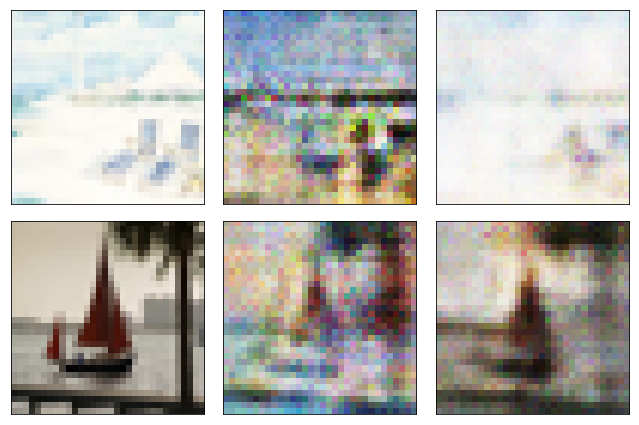

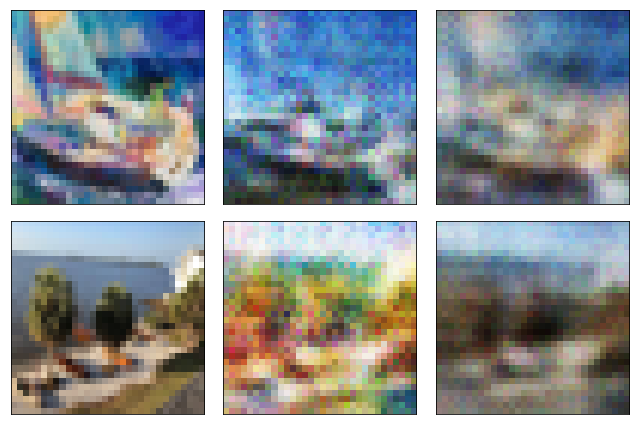

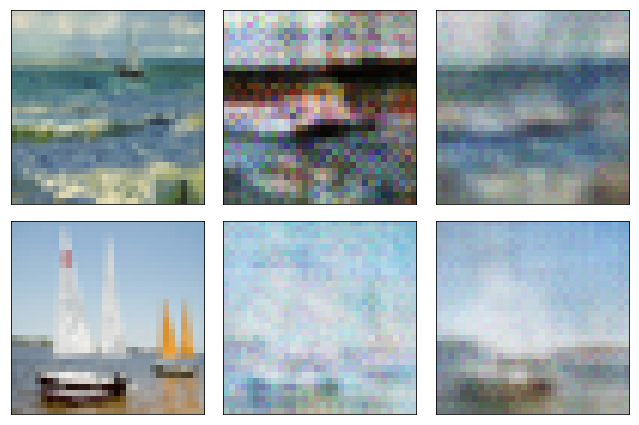

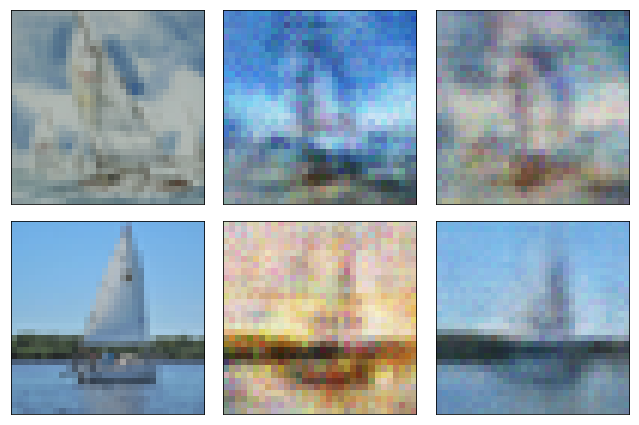

In [17]:
for i in range(4): show_grid(test_ims[i])

In [18]:
# Training duration
print(t2-t1)

0:50:54.785525


## increase size 64

In [19]:
opt = TrainOptions().parse(['--dataroot', './data/cyclic/sail_pict2watercolor', '--nThreads', '1', '--no_dropout',
                           '--niter', '60', '--niter_decay', '60', '--name', 'growing_gans_256', '--gpu_ids', '0',
                            '--fineSize', '64', '--loadSize', '70', '--batchSize', '17', '--continue_train'])

------------ Options -------------
batchSize: 17
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: True
dataroot: ./data/cyclic/sail_pict2watercolor
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 64
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 70
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 1
n_layers_D: 3
name: growing_gans_256
ndf: 64
ngf: 64
niter: 60
niter_decay: 60
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [20]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

CustomDatasetDataLoader
dataset [UnalignedDataset] was created


/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


367

In [21]:
model = create_model(opt)

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inpla

In [22]:
t3 = datetime.datetime.now()
print(t1.strftime("%X"))

total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()
    
t4 = datetime.datetime.now()


01:38:26
22it [00:34,  1.55s/it]
End of epoch 1 / 120 	 Time Taken: 34 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 2 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 3 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 4 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
saving the model at the end of epoch 5, iters 1870
End of epoch 5 / 120 	 Time Taken: 34 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 6 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 7 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 8 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
End of epoch 9 / 120 	 Time Taken: 33 sec
learning rate = 0.0002000
22it [00:33,  1.54s/it]
saving the model at the end of epoch 10, iters 3740
End of epoch 10 / 120 	 Time Taken: 

End of epoch 80 / 120 	 Time Taken: 35 sec
learning rate = 0.0001311
22it [00:34,  1.55s/it]
End of epoch 81 / 120 	 Time Taken: 34 sec
learning rate = 0.0001279
22it [00:33,  1.54s/it]
End of epoch 82 / 120 	 Time Taken: 33 sec
learning rate = 0.0001246
22it [00:33,  1.54s/it]
End of epoch 83 / 120 	 Time Taken: 33 sec
learning rate = 0.0001213
22it [00:33,  1.54s/it]
End of epoch 84 / 120 	 Time Taken: 33 sec
learning rate = 0.0001180
22it [00:33,  1.54s/it]
saving the model at the end of epoch 85, iters 31790
End of epoch 85 / 120 	 Time Taken: 34 sec
learning rate = 0.0001148
22it [00:33,  1.54s/it]
End of epoch 86 / 120 	 Time Taken: 33 sec
learning rate = 0.0001115
22it [00:33,  1.54s/it]
End of epoch 87 / 120 	 Time Taken: 33 sec
learning rate = 0.0001082
22it [00:34,  1.55s/it]
End of epoch 88 / 120 	 Time Taken: 34 sec
learning rate = 0.0001049
22it [00:34,  1.55s/it]
End of epoch 89 / 120 	 Time Taken: 34 sec
learning rate = 0.0001016
22it [00:34,  1.55s/it]
saving the model 

In [23]:
print( t4-t3 )

1:08:21.036066


In [24]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    test_ims.append(get_one(o))

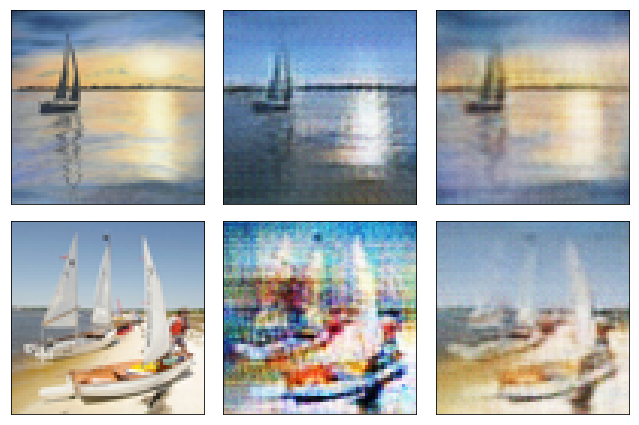

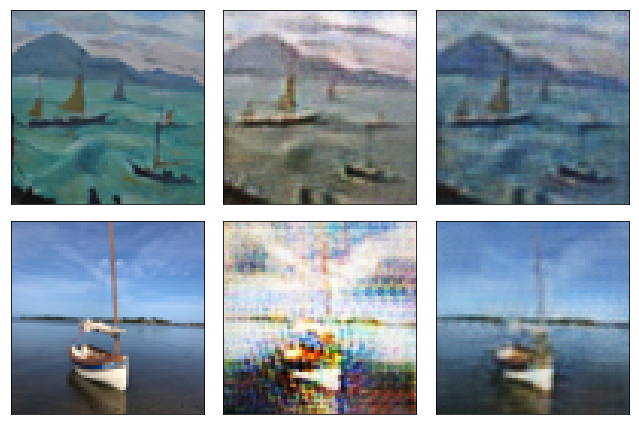

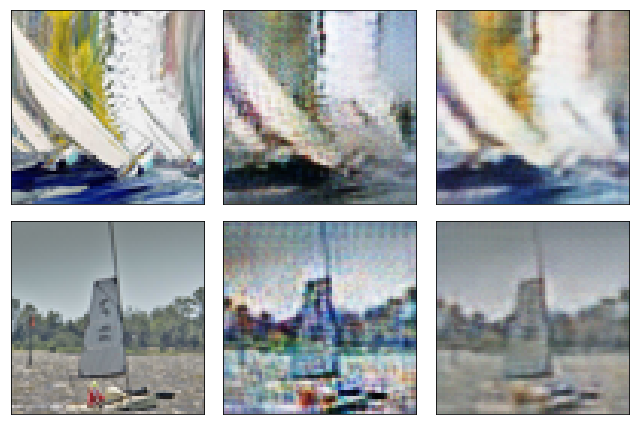

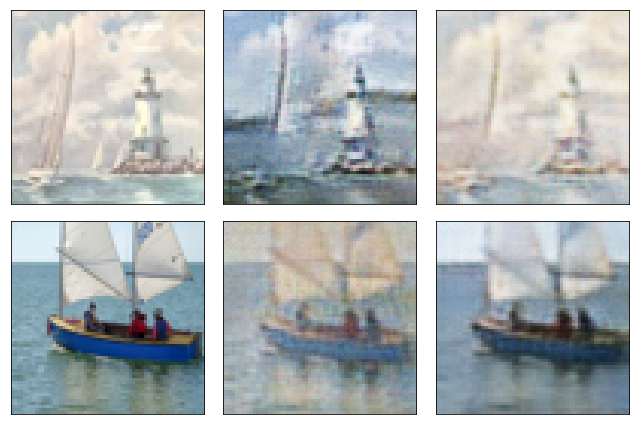

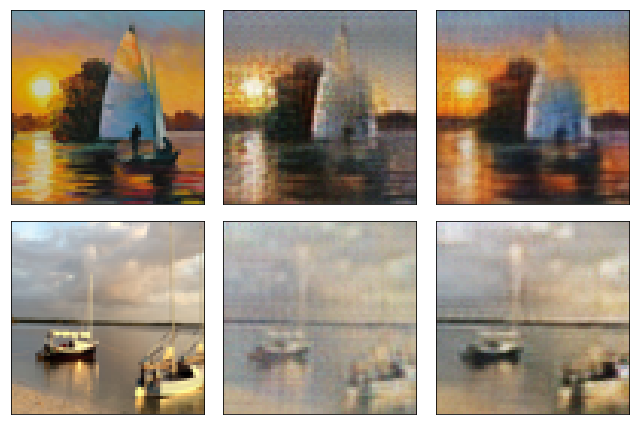

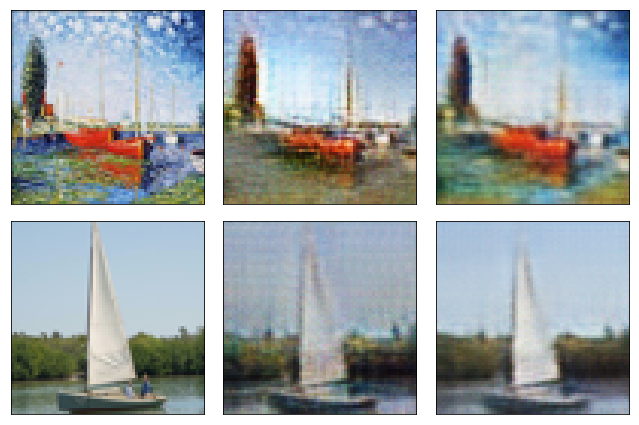

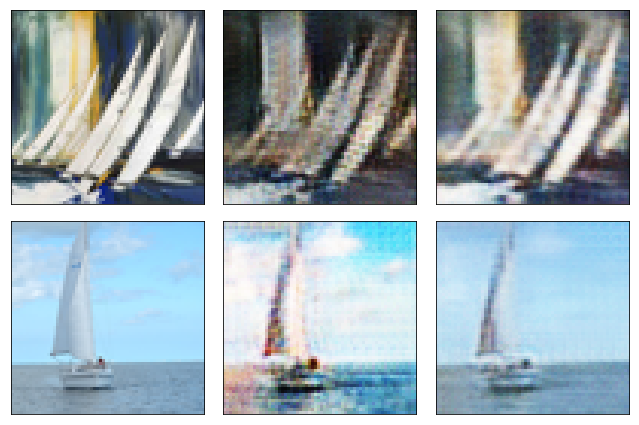

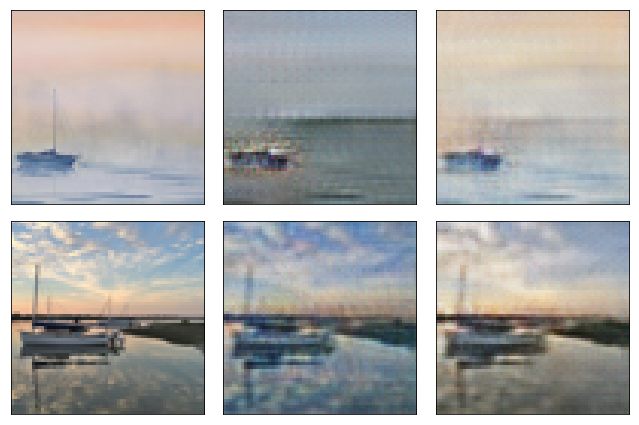

In [25]:
for i in range(8): show_grid(test_ims[i])

In [26]:
# Training duration
print(t4-t1)

1:59:23.180355


## Increase Size 128

In [27]:
opt = TrainOptions().parse(['--dataroot', './data/cyclic/sail_pict2watercolor', '--nThreads', '1', '--no_dropout',
                           '--niter', '30', '--niter_decay', '30', '--name', 'growing_gans_256', '--gpu_ids', '0',
                            '--fineSize', '128', '--loadSize', '140', '--batchSize', '4', '--continue_train'])

------------ Options -------------
batchSize: 4
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: True
dataroot: ./data/cyclic/sail_pict2watercolor
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 128
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 140
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 1
n_layers_D: 3
name: growing_gans_256
ndf: 64
ngf: 64
niter: 30
niter_decay: 30
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [28]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size
model = create_model(opt)

CustomDatasetDataLoader
dataset [UnalignedDataset] was created
cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]


/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inplace)
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (6): InstanceN

In [29]:
t5 = datetime.datetime.now()
print(t1.strftime("%X"))

total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()
    
t6 = datetime.datetime.now()


01:38:26
92it [02:27,  1.61s/it]
End of epoch 1 / 60 	 Time Taken: 147 sec
learning rate = 0.0002000
92it [02:27,  1.61s/it]
End of epoch 2 / 60 	 Time Taken: 147 sec
learning rate = 0.0002000
92it [02:27,  1.61s/it]
End of epoch 3 / 60 	 Time Taken: 147 sec
learning rate = 0.0002000
92it [02:27,  1.61s/it]
End of epoch 4 / 60 	 Time Taken: 147 sec
learning rate = 0.0002000
92it [02:27,  1.61s/it]
saving the model at the end of epoch 5, iters 1840
End of epoch 5 / 60 	 Time Taken: 148 sec
learning rate = 0.0002000
92it [02:21,  1.54s/it]
End of epoch 6 / 60 	 Time Taken: 141 sec
learning rate = 0.0002000
92it [02:21,  1.54s/it]
End of epoch 7 / 60 	 Time Taken: 141 sec
learning rate = 0.0002000
92it [02:21,  1.54s/it]
End of epoch 8 / 60 	 Time Taken: 141 sec
learning rate = 0.0002000
92it [02:21,  1.54s/it]
End of epoch 9 / 60 	 Time Taken: 141 sec
learning rate = 0.0002000
92it [02:22,  1.54s/it]
saving the model at the end of epoch 10, iters 3680
End of epoch 10 / 60 	 Time Taken: 1

In [30]:
print( t6-t5 )

2:22:42.376572


In [31]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    test_ims.append(get_one(o))

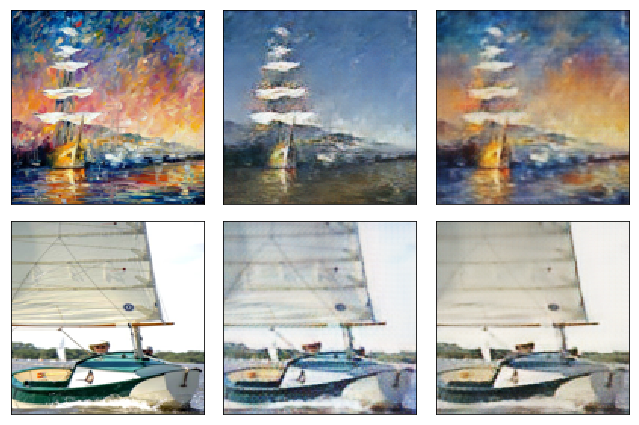

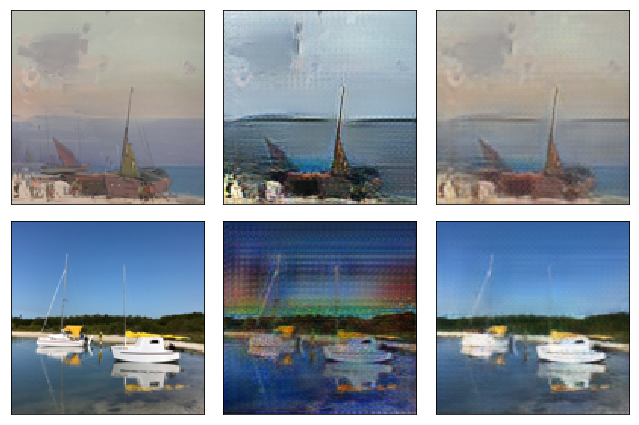

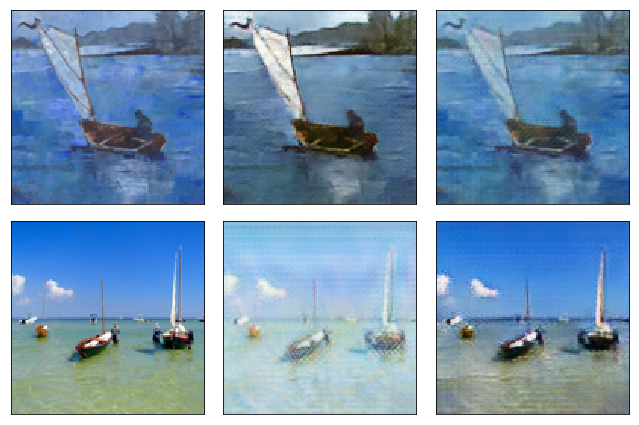

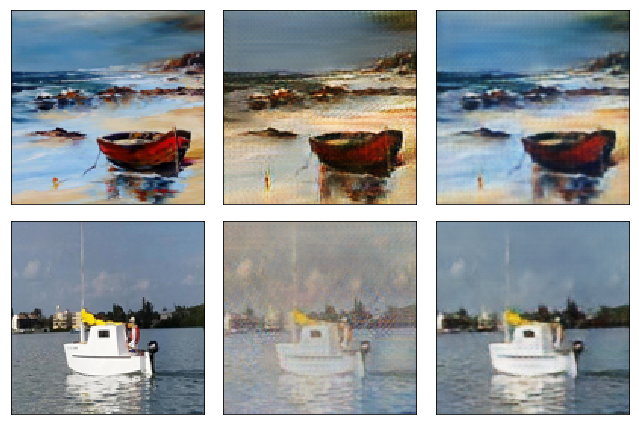

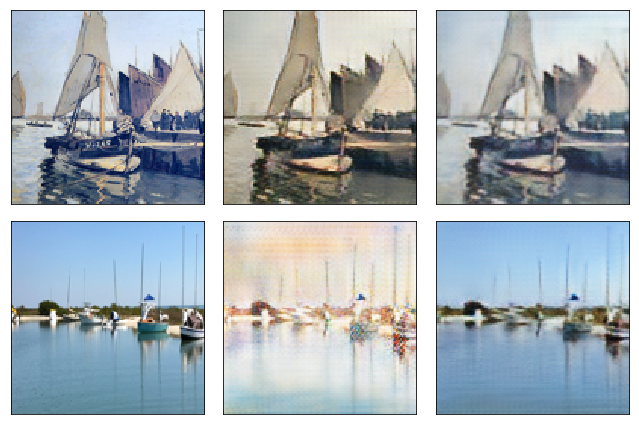

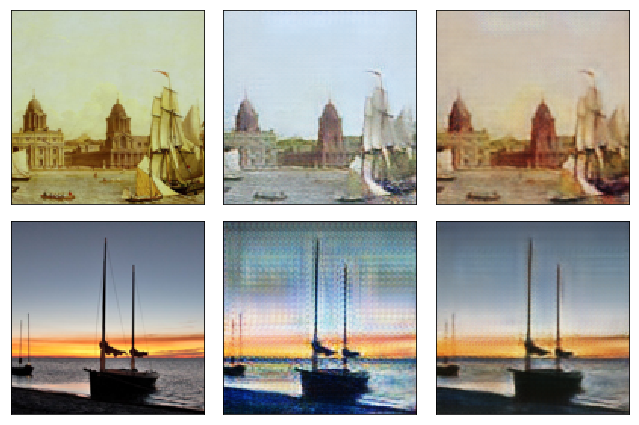

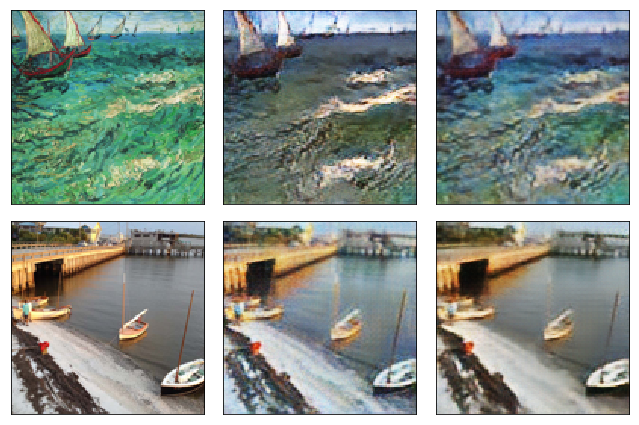

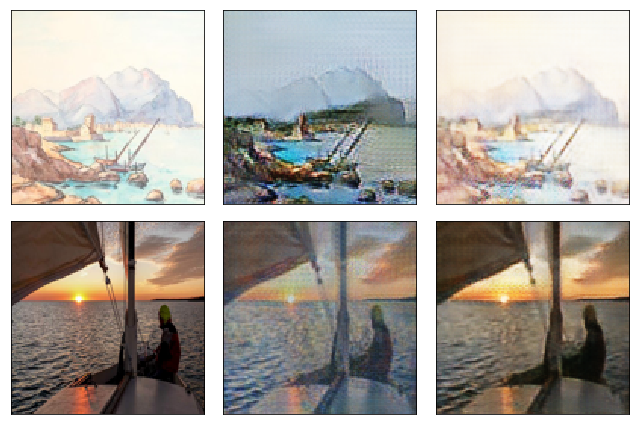

In [32]:
for i in range(8): show_grid(test_ims[i])

In [33]:
# Training duration
print(t6-t1)

4:22:11.082998


## Increase Size 256

In [34]:
opt = TrainOptions().parse(['--dataroot', './data/cyclic/sail_pict2watercolor', '--nThreads', '1', '--no_dropout',
                           '--niter', '20', '--niter_decay', '20', '--name', 'growing_gans_256', '--gpu_ids', '0',
                            '--fineSize', '256', '--loadSize', '280', '--batchSize', '1', '--continue_train'])

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: True
dataroot: ./data/cyclic/sail_pict2watercolor
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 280
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 1
n_layers_D: 3
name: growing_gans_256
ndf: 64
ngf: 64
niter: 20
niter_decay: 20
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [35]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size
model = create_model(opt)

CustomDatasetDataLoader
dataset [UnalignedDataset] was created
cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]


/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inplace)
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (6): InstanceN

In [ ]:
t7 = datetime.datetime.now()
print(t1.strftime("%X"))

total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()
    
t8 = datetime.datetime.now()


01:38:26
367it [09:54,  1.62s/it]
End of epoch 1 / 40 	 Time Taken: 594 sec
learning rate = 0.0002000
367it [09:54,  1.62s/it]
End of epoch 2 / 40 	 Time Taken: 594 sec
learning rate = 0.0002000
367it [09:54,  1.62s/it]
End of epoch 3 / 40 	 Time Taken: 594 sec
learning rate = 0.0002000
367it [09:54,  1.62s/it]
End of epoch 4 / 40 	 Time Taken: 594 sec
learning rate = 0.0002000
367it [09:54,  1.62s/it]
saving the model at the end of epoch 5, iters 1835
End of epoch 5 / 40 	 Time Taken: 595 sec
learning rate = 0.0002000
0it [00:00, ?it/s]

In [ ]:
print( t8-t7 )

In [ ]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    test_ims.append(get_one(o))

In [ ]:
for i in range(8): show_grid(test_ims[i])

In [ ]:
# Training duration
print(t8-t1)

## fin